In [1]:
from dotenv import load_dotenv
import pandas as pd
import os

_ = load_dotenv()

GH_USER = os.environ["GH_USERNAME"]
GH_TOKEN = os.environ["GH_TOKEN"]

In [2]:
sampled_repo_graphics_df = pd.read_csv("sampled_repo_graphics_df.csv")
sampled_repo_graphics_df

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Graphic_Files_Length
0,sprossiter/JSIT/,2024-08-26 23:12:56+00:00,1.0,2.0,['src/main/resources/docs/diagrams/alAddDepend...,6
1,baidu/broc/,2024-10-25 16:02:35+00:00,4.0,100.0,"['doc/dependent_relationship.jpg', 'doc/flowch...",3
2,telldus/telldus/,2024-09-09 12:44:16+00:00,10.0,64.0,['telldus-gui/3rdparty/qtsingleapplication/doc...,106
3,Splamy/TS3AudioBot/,2024-11-14 13:01:16+00:00,12.0,698.0,"['TS3AudioBot/Media/SleepingKitty.png', 'TS3Au...",5
4,benmfaul/XRTB/,2024-05-17 07:27:22+00:00,1.0,121.0,"['src/Test.uml', 'src/com/xrtb/bidder/Campaign...",54
...,...,...,...,...,...,...
211,Vdragon/NTOU_CPP_Lab_Opensource_Project/,2024-03-19 13:36:53+00:00,0.0,3.0,"['Lab_6_1/Class_diagram/Lab 6-1.uml', 'Lab_6_2...",2
212,tarbrain/TBStateMachine/,2024-02-13 10:47:56+00:00,1.0,49.0,['Documentation/test_setup.png'],1
213,apache/click/,2024-10-07 04:28:28+00:00,4.0,14.0,['documentation/docs/velocity/images/logo.gif'...,135
214,streambuf/recognition_numbers/,2024-04-16 11:26:55+00:00,1.0,12.0,"['screenshots/1.png', 'screenshots/2.png', 'sc...",4


In [3]:
sampled_repo_graphics_df['Graphic_Files_Length'].sum()

61065

## Check if graphics is UML class diagram

This is a combination of LLM and manual filtering

In [4]:
import torch 
torch.cuda.is_available()

False

: 

In [5]:
from transformers import AutoModel, AutoTokenizer

filepath_model = "C:/Users/biadge/MiniCPM-o-2_6"  # path to the model
model = AutoModel.from_pretrained(filepath_model, 
                                  trust_remote_code=True, 
                                  use_safetensors=True,
                                  attn_implementation='sdpa', 
                                  torch_dtype=torch.bfloat16, 
                                  init_vision=True,
                                  init_audio=True,
                                  init_tts=True)

model = model.eval().cuda()

tokenizer = AutoTokenizer.from_pretrained(filepath_model, trust_remote_code=True)
model.init_tts()

c:\Users\biadge\uml_code_traceability\.venv\Lib\site-packages\transformers\models\auto\image_processing_auto.py:513: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

RuntimeError: No CUDA GPUs are available

In [6]:
import requests
import os
from PIL import Image

def run_detect_uml(model, tokenizer, project, file):

    image_url = f"https://raw.githubusercontent.com/{project[:-1]}/master/{file}".format(project=project, file=file)

    # from the image url, download the image to a temporary file which will be deleted later

    os.makedirs(f'images/{project}', exist_ok=True)
    with open(f'images/{project}/{os.path.basename(file)}', 'wb') as f:
        f.write(requests.get(image_url).content)

    try:
        image = Image.open(f'images/{project}/{os.path.basename(file)}').convert('RGB')

        question = "Is this image a UML class diagram? Only answer 'True' if yes or 'False' if no."
        msgs=[{'role': 'user', 
           'content': [image,question]}]
        res = model.chat(
        msgs=msgs,
        tokenizer=tokenizer
    )
    except:
        return "Error"
    finally:
        os.remove(f'images/{project}/{os.path.basename(file)}')

    return res

In [7]:
# uncomment this to run LLM check images for UML class diagram

# from tqdm.notebook import tqdm
# import ast
# tqdm.pandas()

# range_df = range(22)

# for ctr in range_df:
#     print(f"Processing chunk {ctr}")

#     sampled_repo_graphics_df = pd.read_csv(f"sampled_repo_graphics_df_{ctr}.csv")

#     sampled_repo_graphics_df['Graphic_Files'] = sampled_repo_graphics_df['Graphic_Files'].apply(lambda x: ast.literal_eval(x))
#     sampled_repo_graphics_df = sampled_repo_graphics_df.explode('Graphic_Files')
#     sampled_repo_graphics_df = sampled_repo_graphics_df.drop(columns=['Graphic_Files_Length'])
#     sampled_repo_graphics_df = sampled_repo_graphics_df.reset_index(drop=True)

#     print(sampled_repo_graphics_df.shape)

#     sampled_repo_graphics_df['Is_UML'] = sampled_repo_graphics_df.progress_apply(lambda x: run_detect_uml(model, tokenizer, x['Project'], x['Graphic_Files']), axis=1)
#     sampled_repo_graphics_df.to_csv(f"sampled_repo_graphics_uml_df_{ctr}.csv", index=False) 


In [8]:
# get results of LLM and manual filtering

sampled_repo_graphics_uml_df = pd.read_csv("sampled_repo_graphics_uml_df.csv")
sampled_repo_graphics_uml_df['File_Type'] = sampled_repo_graphics_uml_df['Graphic_Files'].apply(lambda x: x.rsplit('.', 1)[-1])
sampled_repo_graphics_uml_df

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Is_UML,File_Type
0,andrenho/perminal/,2024-11-09 16:47:23+00:00,1,0,.old/cpp/frontend/latin1.png,False,png
1,andrenho/perminal/,2024-11-09 16:47:23+00:00,1,0,.old/rust/data/latin1.png,False,png
2,andrenho/perminal/,2024-11-09 16:47:23+00:00,1,0,docs/sequence.png,False,png
3,andrenho/perminal/,2024-11-09 16:47:23+00:00,1,0,docs/sequence.uml,False,uml
4,aplgithub/haikudepotserver/,2024-11-09 13:06:22+00:00,17,18,docs/images/img-architectureoverview.png,False,png
...,...,...,...,...,...,...,...
61060,streambuf/recognition_numbers/,2024-04-16 11:26:55+00:00,1,12,screenshots/1.png,False,png
61061,streambuf/recognition_numbers/,2024-04-16 11:26:55+00:00,1,12,screenshots/2.png,False,png
61062,streambuf/recognition_numbers/,2024-04-16 11:26:55+00:00,1,12,screenshots/3.png,False,png
61063,streambuf/recognition_numbers/,2024-04-16 11:26:55+00:00,1,12,screenshots/UML3.png,True,png


In [9]:
# file types to check with LLM

files_check = {'uml', 'xmi', 'plantuml', 'puml'}

# filter df if file type exists to check

to_check = sampled_repo_graphics_uml_df[sampled_repo_graphics_uml_df['File_Type'].apply(lambda x: x in files_check)]
to_check

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Is_UML,File_Type
3,andrenho/perminal/,2024-11-09 16:47:23+00:00,1,0,docs/sequence.uml,False,uml
71,athiasjerome/XORCISM/,2024-06-19 18:25:44+00:00,1,23,MODELS/XTHREAT/Model XTHREAT.uml,False,uml
75,benmfaul/XRTB/,2024-05-17 07:27:22+00:00,1,121,src/Test.uml,False,uml
76,benmfaul/XRTB/,2024-05-17 07:27:22+00:00,1,121,src/com/xrtb/bidder/CampaignProcessor.uml,False,uml
1992,telldus/telldus/,2024-09-09 12:44:16+00:00,10,64,xpl/data/uml.xmi,False,xmi
...,...,...,...,...,...,...,...
60918,Andresteve07/FINAL_AyED/,2024-10-18 03:46:57+00:00,1,2,Otros/Diagrama_Clases_Final_AyED.xmi,False,xmi
60920,Andresteve07/FINAL_AyED/,2024-10-18 03:46:57+00:00,1,2,Otros/Diagrama_Clases_Final_AyED_v2.xmi,False,xmi
60921,askpt/LAPR3/,2024-07-23 13:47:22+00:00,4,0,Modeling/Modeling/ModelDefinition/Modeling.uml,False,uml
60922,Vdragon/NTOU_CPP_Lab_Opensource_Project/,2024-03-19 13:36:53+00:00,0,3,Lab_6_1/Class_diagram/Lab 6-1.uml,True,uml


In [10]:
def run_detect_class_diagram(model, tokenizer, project, file):

    image_url = f"https://raw.githubusercontent.com/{project[:-1]}/master/{file}".format(project=project, file=file)

    # from the image url, download the image to a temporary file which will be deleted later

    os.makedirs(f'llm_check/{project}', exist_ok=True)
    with open(f'llm_check/{project}/{os.path.basename(file)}', 'wb') as f:
        f.write(requests.get(image_url).content)

    try:

        with open(f'llm_check/{project}/{os.path.basename(file)}', 'rb') as file:
            content = file.read()

        question = "Is this image a UML class diagram? Only answer 'True' if yes or 'False' if no."
        msgs=[{'role': 'user', 
           'content': [content,question]}]
        res = model.chat(
        msgs=msgs,
        tokenizer=tokenizer
    )
    except Exception as e:
        print(f"Error with {project} {file}")
        print(e)
        return "Error"

    return res

### Filter UML Class Diagrams

In [ ]:
uml_cd_df = sampled_repo_graphics_uml_df[sampled_repo_graphics_uml_df['Is_UML'] == True]
uml_cd_df = uml_cd_df[['Project',	'Last_Activity',	'Contributors',	'Stargazers', 'UML_Files',	'UML_Files_Length']]
uml_cd_df

NameError: name 'sampled_repo_graphics_uml_df' is not defined

In [ ]:
filtered_repo_graphics_check_df.tail()

,Project,Last_Activity,Contributors,Stargazers,UML_Files,UML_Files_Length
40,stefanoborini/modelviewcontroller-src/,2024-07-16 04:51:11+00:00,1.0,37.0,[01-basics-of-mvc/images/DocumentViewDesign.pn...,15
41,AnalogDevicesLyricLabs/dimple/,2024-04-02 07:25:15+00:00,4.0,80.0,"[doc/DimpleUserManual/images/Cpp.png, doc/Dimp...",9
42,airingursb/EMPs/,2023-12-13 12:11:28+00:00,1.0,8.0,"[WebRoot/WEB-INF/classes/uml.uml, WebRoot/imag...",19
43,AnimalPlanet/pdf-to-mindmap-and-ppt-with-textr...,2024-10-16 15:35:57+00:00,2.0,3.0,"[class-diagram.gif, final_class_diagram.gif, o...",4
44,cjw-network/cjw_newsletter/,2024-01-09 23:24:13+00:00,2.0,17.0,"[doc/uml/cjw_newsletter_dbschema_v1.0.0.png, d...",2


In [ ]:
filtered_repo_graphics_check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Project           45 non-null     object 
 1   Last_Activity     45 non-null     object 
 2   Contributors      45 non-null     float64
 3   Stargazers        45 non-null     float64
 4   UML_Files         45 non-null     object 
 5   UML_Files_Length  45 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ KB


In [ ]:
filtered_repo_graphics_check_df.UML_Files_Length.sum()

673

In [ ]:
def get_lines_of_code(repo_name):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/languages', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return None

    languages = r.json()
    total_lines = sum(languages.values())
    return total_lines

def add_lines_of_code(df):
    tqdm.pandas()
    df['Lines_of_Code'] = df['Project'].progress_apply(lambda repo: get_lines_of_code(repo[:-1]))
    return df

uml_with_loc_df = add_lines_of_code(filtered_repo_graphics_check_df)
# remove 0 and NaN
uml_with_loc_df = uml_with_loc_df[~uml_with_loc_df['Lines_of_Code'].isnull()]
uml_with_loc_df = uml_with_loc_df[uml_with_loc_df['Lines_of_Code'] > 0]

# add column 'UML_LOC_ratio'
uml_with_loc_df['UML_LOC_ratio'] = uml_with_loc_df['UML_Files_Length'] / uml_with_loc_df['Lines_of_Code']
uml_with_loc_df.to_csv('uml_with_loc_df.csv', index=False)

 91%|█████████ | 41/45 [00:22<00:02,  1.56it/s]

Error: 404 Client Error: Not Found for url: https://api.github.com/repos/stupidisum/stupidisum.github.io/languages


100%|██████████| 45/45 [00:26<00:00,  1.70it/s]


In [ ]:
def split_uml_files(df):

    # df['UML_Files'] = df['UML_Files'].apply(ast.literal_eval)

    rows = []
    for _, row in df.iterrows():
        for file in row['UML_Files']:
            new_row = row.to_dict()
            new_row['UML_File'] = file
            rows.append(new_row)
    return pd.DataFrame(rows).drop(columns=['UML_Files'])

split_uml_files_df = split_uml_files(uml_with_loc_df)
split_uml_files_df.to_csv('split_uml_files_df.csv', index=False)
split_uml_files_df

,Project,Last_Activity,Contributors,Stargazers,UML_Files_Length,Lines_of_Code,UML_LOC_ratio_scaled,UML_File
0,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3.0,9.0,12,1705.0,1.000000,cv/images/burro/burro.png
1,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3.0,9.0,12,1705.0,1.000000,fileUsersalvarostuffactiveblogindexhtml-clippe...
2,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3.0,9.0,12,1705.0,1.000000,fileUsersalvarostuffactiveblogindexhtml-full.png
3,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3.0,9.0,12,1705.0,1.000000,fileUsersalvarostuffactiveblogindexhtml-thumb.png
4,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3.0,9.0,12,1705.0,1.000000,images/hide-another-detail/after.png
...,...,...,...,...,...,...,...,...
638,apache/activemq-artemis/,2024-11-14 17:11:19+00:00,30.0,947.0,4,36261185.0,0.000012,docs/user-manual/_diagrams/multicast.svg
639,apache/activemq-artemis/,2024-11-14 17:11:19+00:00,30.0,947.0,4,36261185.0,0.000012,docs/user-manual/_diagrams/queue.svg
640,apache/activemq-artemis/,2024-11-14 17:11:19+00:00,30.0,947.0,4,36261185.0,0.000012,docs/user-manual/images/ha-scaledown.png
641,apache/activemq-artemis/,2024-11-14 17:11:19+00:00,30.0,947.0,4,36261185.0,0.000012,docs/user-manual/images/test.png


### Manual UML Check

In [ ]:
import os
import requests
from tqdm import tqdm

def sanitize_folder_name(folder_name):
    return "".join(c if c.isalnum() or c in (' ', '.', '_') else '_' for c in folder_name)

def download_file(url, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder, exist_ok=True)
    response = requests.get(url, stream=True)
    file_name = os.path.join(dest_folder, url.split('/')[-1])
    with open(file_name, 'wb') as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)

def download_uml_files(df):
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        repo_name = row['Project'][:-1]
        uml_file = row['UML_File']
        sanitized_repo_name = sanitize_folder_name(repo_name)
        dest_folder = os.path.join('images', sanitized_repo_name)
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder, exist_ok=True)
        file_url = f'https://raw.githubusercontent.com/{repo_name}/master/{uml_file}'
        download_file(file_url, dest_folder)


In [ ]:
uml_checked_df = pd.read_csv('split_uml_files_df.csv')
uml_checked_df = uml_checked_df[uml_checked_df['Manual_UML_Check'] == 'Yes'].drop(columns=['Manual_UML_Check'])
uml_checked_df.to_csv('uml_checked_df.csv', index=False)
uml_checked_df

,Project,Last_Activity,Contributors,Stargazers,UML_Files_Length,Lines_of_Code,UML_LOC_ratio_scaled,UML_File
6,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3,9,12,1705,1.000000,images/plantuml-example/plantuml-singer.png
20,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,0.035686,pattern/src/main/java/mx/umb/pattern/concurren...
23,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,0.035686,pattern/src/main/java/mx/umb/pattern/concurren...
27,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,0.035686,pattern/src/main/java/mx/umb/pattern/concurren...
29,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,0.035686,pattern/src/main/java/mx/umb/pattern/concurren...
...,...,...,...,...,...,...,...,...
627,asterisk/pjproject/,2024-10-29 14:10:51+00:00,30,6,4,18691283,0.000027,pjnath/docs/UML-class-diagram.png
634,adityaapte/CERR/,2024-11-06 14:09:43+00:00,7,192,7,36085779,0.000024,Unit_Testing/matlab_xunit_3/matlab_xunit/archi...
635,adityaapte/CERR/,2024-11-06 14:09:43+00:00,7,192,7,36085779,0.000024,Unit_Testing/matlab_xunit_3/matlab_xunit/archi...
636,adityaapte/CERR/,2024-11-06 14:09:43+00:00,7,192,7,36085779,0.000024,Unit_Testing/matlab_xunit_3/matlab_xunit/archi...


In [ ]:
# normalise the UML LOC ratio column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

uml_checked_df = pd.read_csv('uml_checked_df.csv').drop(columns=['UML_LOC_ratio_scaled'])
uml_checked_df['UML_LOC_ratio'] = uml_checked_df['UML_Files_Length'] / uml_checked_df['Lines_of_Code']
uml_checked_df['UML_LOC_ratio'] = scaler.fit_transform(uml_checked_df[['UML_LOC_ratio']])
uml_checked_df.rename(columns={'UML_LOC_ratio': 'UML_LOC_ratio_scaled'}, inplace=True)
#uml_checked_df.sort_values(by='UML_LOC_ratio_scaled', ascending=False, inplace=True)
uml_checked_df.reset_index(drop=True, inplace=True)
uml_checked_df.to_csv('uml_with_loc_scaled_df.csv', index=False)

In [ ]:
uml_with_loc_df = pd.read_csv('uml_with_loc_scaled_df.csv')
uml_with_loc_df.head()

,Project,Last_Activity,Contributors,Stargazers,UML_Files_Length,Lines_of_Code,UML_File,UML_LOC_ratio_scaled
0,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3,9,12,1705,images/plantuml-example/plantuml-singer.png,1.000000
1,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,pattern/src/main/java/mx/umb/pattern/concurren...,0.035686
2,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,pattern/src/main/java/mx/umb/pattern/concurren...,0.035686
3,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,pattern/src/main/java/mx/umb/pattern/concurren...,0.035686
4,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,76,302563,pattern/src/main/java/mx/umb/pattern/concurren...,0.035686


In [ ]:
# get the suffix file format of every uml file, and show as unique set
uml_with_loc_df['UML_File'].apply(lambda x: x.split('.')[-1]).unique()

array(['png', 'jpg', 'gif', 'PNG'], dtype=object)

In [ ]:
# group the UML files into a list per project, put all the columns back grouped by project
grouped_uml_files_df = uml_with_loc_df.groupby(['Project', 'Last_Activity', 'Contributors', 'Stargazers', 'UML_Files_Length', 'Lines_of_Code', 'UML_LOC_ratio_scaled'])['UML_File'].apply(list).reset_index()
# enclose each element in the list in UML_Files column with ' ' to make it a string
grouped_uml_files_df['UML_File'] = grouped_uml_files_df['UML_File'].apply(lambda x: [f"'{y}'" for y in x])
grouped_uml_files_df.rename(columns={'UML_File': 'UML_Files'}, inplace=True)
grouped_uml_files_df['UML_Files_Length'] = grouped_uml_files_df['UML_Files'].apply(len)
grouped_uml_files_df = grouped_uml_files_df[['Project', 'Last_Activity', 'Contributors', 'Stargazers', 'Lines_of_Code', 'UML_LOC_ratio_scaled', 'UML_Files', 'UML_Files_Length']]
grouped_uml_files_df.to_csv('grouped_uml_files_df.csv', index=False)
grouped_uml_files_df.head()

,Project,Last_Activity,Contributors,Stargazers,Lines_of_Code,UML_LOC_ratio_scaled,UML_Files,UML_Files_Length
0,AnalogDevicesLyricLabs/dimple/,2024-04-02 07:25:15+00:00,4,80,7224951,0.000173,['modelers/matlab/lib/xunit_dist/matlab_xunit/...,3
1,AnimalPlanet/pdf-to-mindmap-and-ppt-with-textr...,2024-10-16 15:35:57+00:00,2,3,14224669,0.000036,"['class-diagram.gif', 'final_class_diagram.gif']",2
2,Stealth80/NickHollis/,2023-12-07 01:55:40+00:00,1,0,624377,0.030489,['MobileFriendlyWebApp/public/img/class-diagra...,1
3,ValentinMinder/CirculationMediator/,2024-05-02 14:47:54+00:00,3,1,47692,0.014892,['TheoreticalMediator/presentation/graphics/UM...,5
4,abulka/pynsource/,2024-11-09 15:06:43+00:00,4,287,7428438,0.000608,"['Admin/doco-uml/OGL-like UML 2015.png', 'Admi...",14


In [ ]:
grouped_uml_files_df.tail()

,Project,Last_Activity,Contributors,Stargazers,Lines_of_Code,UML_LOC_ratio_scaled,UML_Files,UML_Files_Length
15,sones/sones/,2024-11-12 20:04:40+00:00,5,213,8246454,0.000375,['Documentation/media/documentation/database/e...,1
16,tlin-fei/ds4p/,2024-01-13 23:52:04+00:00,0,1,6462777,0.000370,['DS4P/acs-showcase/ACS Showcase Class Diagram...,2
17,universAAL/ontology/,2024-09-06 05:54:56+00:00,9,13,3349200,0.001057,['ont.cryptographic/src/main/javadoc/Cryptogra...,9
18,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,302563,0.035686,['pattern/src/main/java/mx/umb/pattern/concurr...,49
19,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3,9,1705,1.000000,['images/plantuml-example/plantuml-singer.png'],1


In [ ]:
grouped_uml_files_df['UML_Files_Length'].sum()

103

### Get old UML models

In [ ]:
full_repo_model_df = pd.read_csv('UMLFiles_List_V2.0.csv')

# clean the string in model link to just reflect file name similar to UML files in uml_loc_df, include the directory from root
full_repo_model_df['Model Link - Github'] = full_repo_model_df['Model Link - Github'].apply(lambda x: x.split('master/')[-1])
# groupby the Projects
grouped_models_df = full_repo_model_df.groupby('Project')['Model Link - Github'].apply(list).reset_index()
# every element in the model link list to be encaved in ' ' since they are strings
grouped_models_df['Model Link - Github'] = grouped_models_df['Model Link - Github'].apply(lambda x: [f"'{y}'" for y in x])
# add length of model link list
grouped_models_df['Model Link Length'] = grouped_models_df['Model Link - Github'].apply(len)

# rename the columns
grouped_models_df.rename(columns={'Model Link - Github': 'Old_UML_Files', 'Model Link Length': 'Old_UML_Files_Length'}, inplace=True)
grouped_models_df

,Project,Old_UML_Files,Old_UML_Files_Length
0,0-complexity/ovcdoc_public/,['Sysadmin/AdminArchitecture.png'],1
1,0003088/libelektra-qt-gui-test/,['doc/images/overview_plugins.xmi'],1
2,00s/deadman/,['diagram/zombie-game Activity Diagram.png'],1
3,01db0y/ImageUploader/,['Content/img/Class Diagram1.png'],1
4,01db0y/ShareIt/,['FancyImageUploader/Content/img/Class Diagram...,1
...,...,...,...
24725,zyq001/SDN-based-PubSub-System/,['wsn-sdn/logs/umltest.uml'],1
24726,zyxstar/md_note/,"['imgs/effective_uml_01.png', 'imgs/effective_...",37
24727,zz2/zft/,['dashboard/doc/rackspace-python-cloudfiles-e8...,42
24728,zztimy/as1_Counter/,['doc/timoteiUML.jpeg'],1


In [ ]:
# Ensure 'Project' column is of type string in both dataframes
grouped_uml_files_df['Project'] = grouped_uml_files_df['Project'].astype(str)
grouped_models_df['Project'] = grouped_models_df['Project'].astype(str)

# Get the previous UML files for each project
merged_uml_df = grouped_uml_files_df.join(grouped_models_df.set_index('Project'), on='Project', how='left')
merged_uml_df.reset_index(drop=True, inplace=True)
merged_uml_df = merged_uml_df[['Project', 'Last_Activity', 'Contributors', 'Stargazers', 'Lines_of_Code', 'UML_LOC_ratio_scaled', 'UML_Files',  'Old_UML_Files', 'UML_Files_Length', 'Old_UML_Files_Length']]
merged_uml_df.to_csv('merged_uml_df.csv', index=False)

In [ ]:
merged_uml_df.head()

,Project,Last_Activity,Contributors,Stargazers,Lines_of_Code,UML_LOC_ratio_scaled,UML_Files,Old_UML_Files,UML_Files_Length,Old_UML_Files_Length
0,AnalogDevicesLyricLabs/dimple/,2024-04-02 07:25:15+00:00,4,80,7224951,0.000173,['modelers/matlab/lib/xunit_dist/matlab_xunit/...,['modelers/matlab/lib/xunit_dist/matlab_xunit/...,3,3
1,AnimalPlanet/pdf-to-mindmap-and-ppt-with-textr...,2024-10-16 15:35:57+00:00,2,3,14224669,0.000036,"['class-diagram.gif', 'final_class_diagram.gif']","['class-diagram.gif', 'final_class_diagram.gif']",2,2
2,Stealth80/NickHollis/,2023-12-07 01:55:40+00:00,1,0,624377,0.030489,['MobileFriendlyWebApp/public/img/class-diagra...,['MobileFriendlyWebApp/public/img/class-diagra...,1,1
3,ValentinMinder/CirculationMediator/,2024-05-02 14:47:54+00:00,3,1,47692,0.014892,['TheoreticalMediator/presentation/graphics/UM...,['TheoreticalMediator/presentation/graphics/UM...,5,5
4,abulka/pynsource/,2024-11-09 15:06:43+00:00,4,287,7428438,0.000608,"['Admin/doco-uml/OGL-like UML 2015.png', 'Admi...","['Admin/doco-uml/OGL-like UML.png', 'Research/...",14,8


In [ ]:
merged_uml_df.tail()

,Project,Last_Activity,Contributors,Stargazers,Lines_of_Code,UML_LOC_ratio_scaled,UML_Files,Old_UML_Files,UML_Files_Length,Old_UML_Files_Length
15,sones/sones/,2024-11-12 20:04:40+00:00,5,213,8246454,0.000375,['Documentation/media/documentation/database/e...,['Documentation/media/documentation/database/e...,1,3
16,tlin-fei/ds4p/,2024-01-13 23:52:04+00:00,0,1,6462777,0.000370,['DS4P/acs-showcase/ACS Showcase Class Diagram...,['DS4P/acs-showcase/ACS Showcase Class Diagram...,2,4
17,universAAL/ontology/,2024-09-06 05:54:56+00:00,9,13,3349200,0.001057,['ont.cryptographic/src/main/javadoc/Cryptogra...,['ont.lighting/documentation/ont.lighting clas...,9,18
18,urielbautista/dev/,2024-04-14 01:03:38+00:00,0,0,302563,0.035686,['pattern/src/main/java/mx/umb/pattern/concurr...,['pattern/src/main/java/mx/umb/pattern/concurr...,49,1
19,xenodium/xenodium.github.io/,2024-11-13 13:22:10+00:00,3,9,1705,1.000000,['images/plantuml-example/plantuml-singer.png'],['images/plantuml-example/plantuml-singer.png'],1,1


In [ ]:
merged_uml_df

,Project,Last_Activity,Contributors,Stargazers,Lines_of_Code,UML_LOC_ratio_scaled,UML_Files,Old_UML_Files,UML_Files_Length,Old_UML_Files_Length
0,AnalogDevicesLyricLabs/dimple/,2024-04-02 07:25:15+00:00,4,80,7224951,0.000173,['modelers/matlab/lib/xunit_dist/matlab_xunit/...,['modelers/matlab/lib/xunit_dist/matlab_xunit/...,3,3
1,AnimalPlanet/pdf-to-mindmap-and-ppt-with-textr...,2024-10-16 15:35:57+00:00,2,3,14224669,0.000036,"['class-diagram.gif', 'final_class_diagram.gif']","['class-diagram.gif', 'final_class_diagram.gif']",2,2
2,Stealth80/NickHollis/,2023-12-07 01:55:40+00:00,1,0,624377,0.030489,['MobileFriendlyWebApp/public/img/class-diagra...,['MobileFriendlyWebApp/public/img/class-diagra...,1,1
3,ValentinMinder/CirculationMediator/,2024-05-02 14:47:54+00:00,3,1,47692,0.014892,['TheoreticalMediator/presentation/graphics/UM...,['TheoreticalMediator/presentation/graphics/UM...,5,5
4,abulka/pynsource/,2024-11-09 15:06:43+00:00,4,287,7428438,0.000608,"['Admin/doco-uml/OGL-like UML 2015.png', 'Admi...","['Admin/doco-uml/OGL-like UML.png', 'Research/...",14,8
5,adityaapte/CERR/,2024-11-06 14:09:43+00:00,7,192,36085779,0.000024,['Unit_Testing/matlab_xunit_3/matlab_xunit/arc...,['Unit_Testing/matlab_xunit_3/matlab_xunit/arc...,3,3
6,arcadenea/rockbot/,2024-08-11 21:17:27+00:00,2,5,3733067,0.000110,['docs/diagram.png'],"['docs/diagram.png', 'docs/diagram.xmi']",1,2
7,asterisk/pjproject/,2024-10-29 14:10:51+00:00,30,6,18691283,0.000027,['pjnath/docs/UML-class-diagram.png'],['pjnath/docs/UML-class-diagram.png'],1,1
8,atoader/HilbertRTree/,2024-08-27 02:06:41+00:00,1,31,1524148,0.000183,['doc/Report/img/ClassDiagram.png'],['doc/Report/img/ClassDiagram.png'],1,1
9,berlinbrown/openbotlist/,2024-08-17 22:11:57+00:00,1,2,2668939,0.000209,"['botlist/docs/enterprise/UserLinks.png', 'bot...",['botlist/docs/enterprise/system_feeds/SystemF...,2,2


In [ ]:
def download_old_uml_files(df):
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        repo_name = row['Project'][:-1]
        uml_file = row['Old_UML_File']
        sanitized_repo_name = sanitize_folder_name(repo_name)
        dest_folder = os.path.join('old_images', sanitized_repo_name)
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder, exist_ok=True)
        file_url = f'https://raw.githubusercontent.com/{repo_name}/master/{uml_file}'
        download_file(file_url, dest_folder)

download_old_uml_files(dl_old_uml_df_split)

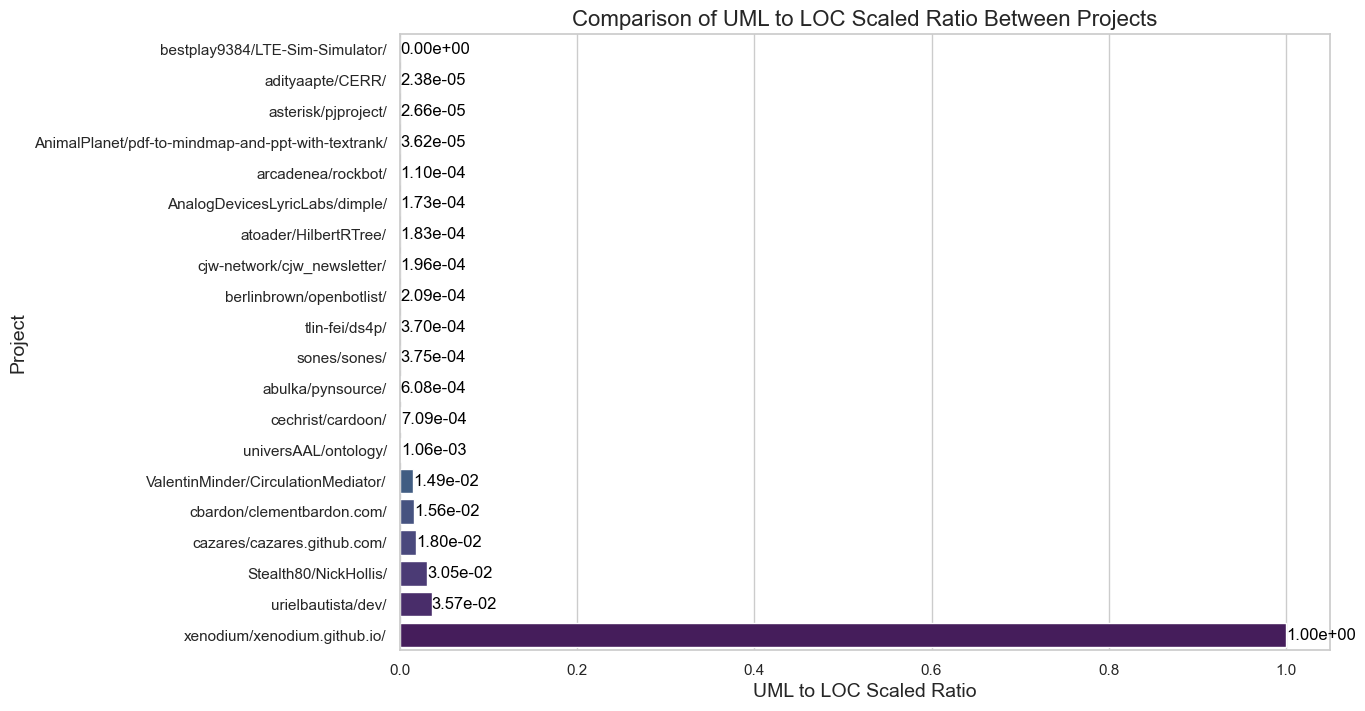

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the dataframe by UML_LOC_Ratio
merged_df_sorted = merged_uml_df.sort_values(by='UML_LOC_ratio_scaled', ascending=False)

# Plot the UML_LOC_Ratio
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='UML_LOC_ratio_scaled', 
    y='Project', 
    data=merged_df_sorted, 
    palette='viridis'
)

# Add labels and title
plt.xlabel('UML to LOC Scaled Ratio', fontsize=14)
plt.ylabel('Project', fontsize=14)
plt.title('Comparison of UML to LOC Scaled Ratio Between Projects', fontsize=16)

# Add value annotations
for index, value in enumerate(merged_df_sorted['UML_LOC_ratio_scaled']):
    barplot.text(value, index, f'{value:.2e}', color='black', ha="left", va="center")

# Invert y-axis to have the highest ratio at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()